<p><span style="font-family: 'Arial Black', Gadget, sans-serif;"><strong><span style="font-size: 22px;">KALMAN FILTER</span></strong></span></p>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

sensor_data1 = 100*np.ones(20)+8*np.random.rand(20)
sensor_data2 = 105*np.ones(20)+5*np.random.rand(20)

print('Sensor1_data :' , sensor_data1)
print('Sensor2_data :' , sensor_data2)

Sensor1_data : [103.53497449 104.46063516 101.68232624 106.04687985 106.30541412
 100.02370297 107.23575689 104.59891035 105.49595704 101.89980219
 102.03468776 103.92887548 107.77175224 107.31259395 103.80917641
 105.19776689 104.14028363 105.59931303 105.22418171 101.53103364]
Sensor2_data : [106.8752701  108.38312609 107.28373873 109.24700375 106.23473655
 106.95288429 106.98121704 109.91175165 107.18244076 109.91033202
 106.02023609 106.97008641 106.3505131  109.02741665 109.74777045
 109.85624324 109.52644351 105.69030771 107.87383594 108.0596342 ]


Find the mean and variance of the sensor data.

mean_sensor1

mean_sensor2

#### Variance
Variance is the spread of the data. The mean does'nt tell much **about** the data. Therefore the variance tells us about the **story** about the data meaning the spread of the data.

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

fill in the below find_meanvariance function 

In [37]:
def find_meanvariance(sensor_data):
    # insert code here
    
    mean = np.mean(sensor_data)
    variance = np.var(sensor_data)
    
    return [mean,variance]

In [41]:
m1,v1 = find_meanvariance(sensor_data1)
m2,v2 = find_meanvariance(sensor_data2)

print('mean1 = ', m1)
print('variance1 = ', v1)
print('mean2 = ', m2)
print('variance2 = ', v2)

mean1 =  104.39170120181961
variance1 =  4.311721679482752
mean2 =  107.90424941360732
variance2 =  1.9730340328249398


#### Gaussian Distribution
A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$
Range is $$[-\inf,\inf] $$

In [48]:
def gaussian_dist(x,mean,variance):
    # insert code here
    
    y = (1/np.power(2*np.pi*variance,0.5))*np.exp(-np.power(x - mean, 2.) / (2 * variance))
    
    return y

<p><span style="font-family: Arial, Helvetica, sans-serif;">Plot both the gaussian distributions</span></p>

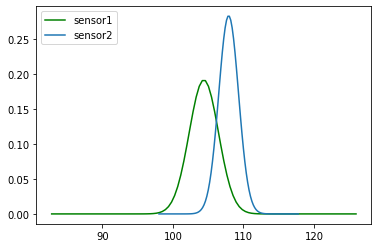

In [52]:
x1 = np.linspace(m1 - 5*v1, m1 + 5*v1, 100)
x2 = np.linspace(m2 - 5*v2, m2 + 5*v2, 100)

# insert code here
y1 = gaussian_dist(x1,m1,v1)
y2 = gaussian_dist(x2,m2,v2)
    
plt.plot(x1,y1,'g-',label='sensor1')
plt.plot(x2,y2,label='sensor2')
plt.legend(loc='upper left')
    
plt.show()

New mean is 

$$\mu_\mathtt{new} = \frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2}$$
New variance is
$$\sigma_\mathtt{new} = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}$$

In [53]:
def m_v_new(m1,m2,v1,v2):
    #insert code here
    m_new=(m1*v2+m2*v1)/(v1+v2)
    v_new=(v1*v2)/(v1+v2)
    
    return [m_new,v_new]

<p><span style="font-family: Arial, Helvetica, sans-serif;">Plot the new gaussian distribution</span></p>

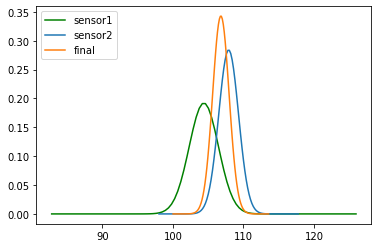

In [54]:
m_new,v_new = m_v_new(m1,m2,v1,v2)

x_new = np.linspace(m_new - 5*v_new, m_new + 5*v_new, 100)
y_new = gaussian_dist(x_new,m_new,v_new)

plt.plot(x1,y1,'g-',label='sensor1')
plt.plot(x2,y2,label='sensor2')
plt.plot(x_new,y_new,label='final')
plt.legend(loc='upper left')
    
plt.show()